<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/Tesis/pipeline_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import statistics
import warnings
import re
# from sklearn.preprocessing import StandardScaler
from IPython.display import display
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport

#2. Exploración de datos.

In [ ]:
# Cargar tus datos en un DataFrame
df = pd.read_csv("/content/Listado Estudiantes.csv", delimiter=';', encoding='latin_1')


##2.2 Descripción de datos

In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre de cada campo o columna'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo de dato'] = [str(dtype) for dtype in df.dtypes]
    description_df['Cantidad de registros no vacíos'] = df.notna().sum().values
    description_df['Cantidad de registros vacíos'] = df.isna().sum().values

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.

data_description_df


,Nombre de cada campo o columna,Descripción,Tipo de dato,Cantidad de registros no vacíos,Cantidad de registros vacíos
0,Año Semestre,,object,388853,0
1,Cuatrimestre población,,object,388853,0
2,Código Estudiante Banner,,object,388853,0
3,Fecha Nacimiento,,object,388721,132
4,Sede,,object,388853,0
5,Código Sede,,object,388853,0
6,Rectoría/Vicerrectoría,,object,388853,0
7,Nivel Académico,,object,388853,0
8,Nivel Formación,,object,388852,1
9,Programa,,object,388852,1


In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre variable'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo'] = [str(dtype) for dtype in df.dtypes]
    description_df['# de registros'] = df.notna().sum().values
    description_df['# de registros vacíos'] = df.isna().sum().values
    description_df['# de valores únicos'] = df.nunique().values

    # Inicializar columnas de rango y moda/mediana con valores vacíos
    description_df['Rango'] = [''] * len(df.columns)
    description_df['Moda/Mediana'] = [''] * len(df.columns)

    for idx, column in enumerate(df.columns):
        # Si la columna es numérica, calcular el rango
        if pd.api.types.is_numeric_dtype(df[column]):
            description_df.loc[idx, 'Rango'] = f'{df[column].min()} - {df[column].max()}'
            description_df.loc[idx, 'Moda/Mediana'] = df[column].median()
        # Si la columna no es numérica, calcular la moda
        else:
            description_df.loc[idx, 'Moda/Mediana'] = df[column].mode().iloc[0] if not df[column].mode().empty else ''

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.
data_description_df

,Nombre variable,Descripción,Tipo,# de registros,# de registros vacíos,# de valores únicos,Rango,Moda/Mediana
0,Año Semestre,,object,388853,0,29,,2016-01
1,Cuatrimestre población,,object,388853,0,6,,Semestre 1
2,Código Estudiante Banner,,object,388853,0,371344,,262861
3,Fecha Nacimiento,,object,388721,132,15910,,21/07/94
4,Sede,,object,388853,0,80,,COA ENGATIVA PRES
5,Código Sede,,object,388853,0,80,,UMD
6,Rectoría/Vicerrectoría,,object,388853,0,10,,Rectoría UNIMINUTO Bogotá
7,Nivel Académico,,object,388853,0,2,,Pregrado
8,Nivel Formación,,object,388852,1,4,,Pregrado
9,Programa,,object,388852,1,97,,Administración de Empresas


## 2.3 Exploracion de datos.

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia'],
      dtype='object')

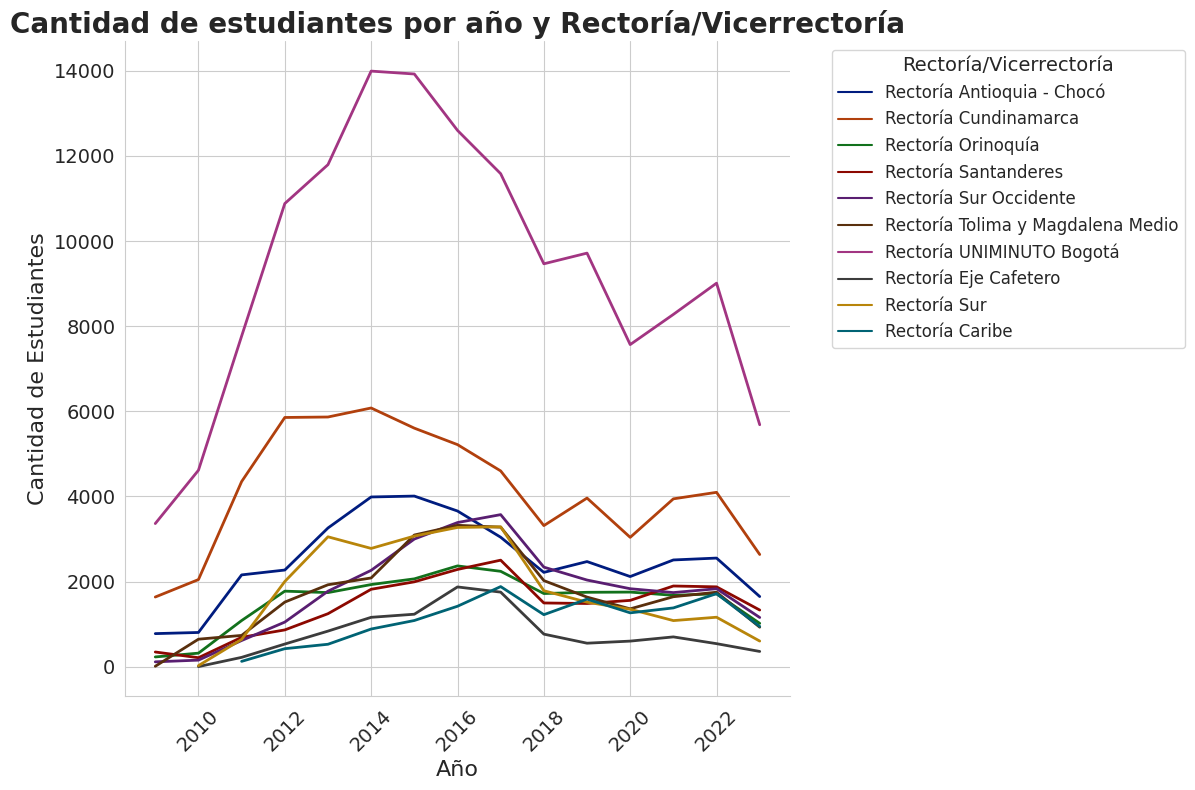

In [ ]:
df['semestre'] = df['Año Semestre'].str.split('-').str.get(1)
df['ano'] = df['Año Semestre'].str.split('-').str.get(0)

# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Rectoría/Vicerrectoría', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Rectoría/Vicerrectoría'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Rectoría/Vicerrectoría', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Rectoría/Vicerrectoría', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Rectoría/Vicerrectoría', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

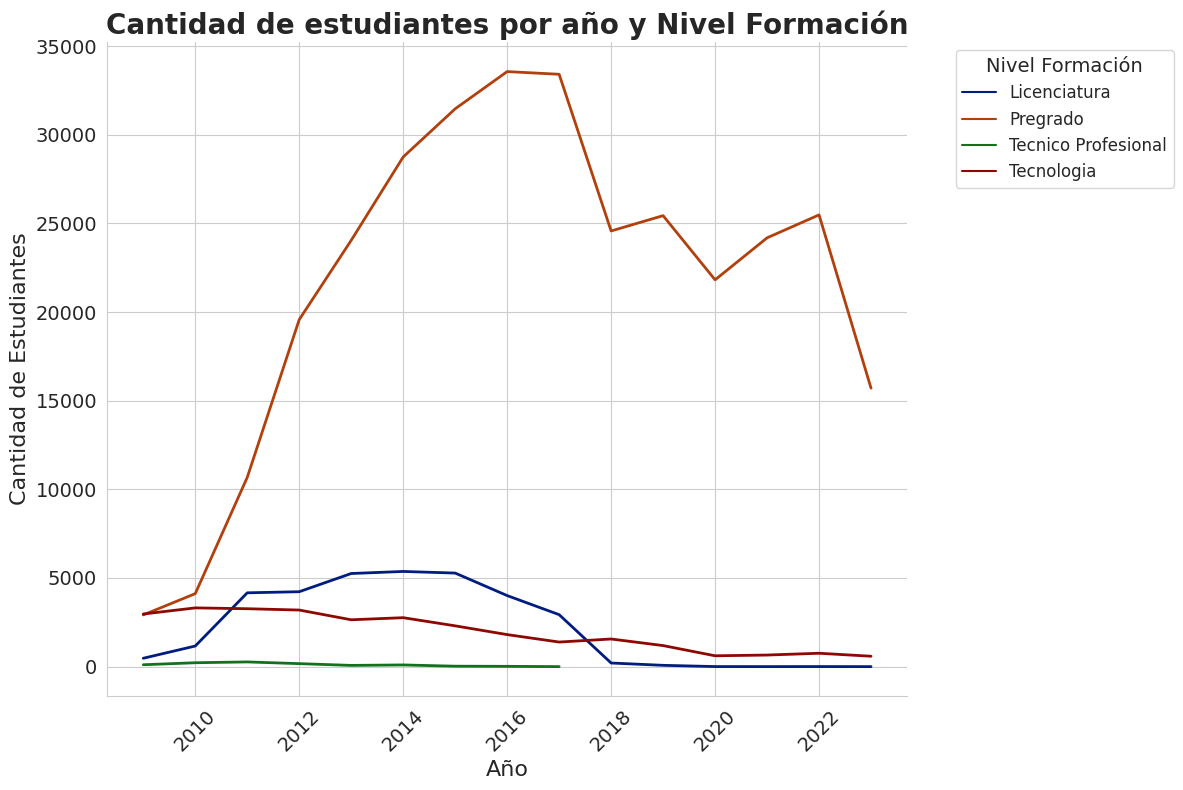

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Nivel Formación', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Nivel Formación'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Nivel Formación', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Nivel Formación', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Nivel Formación', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

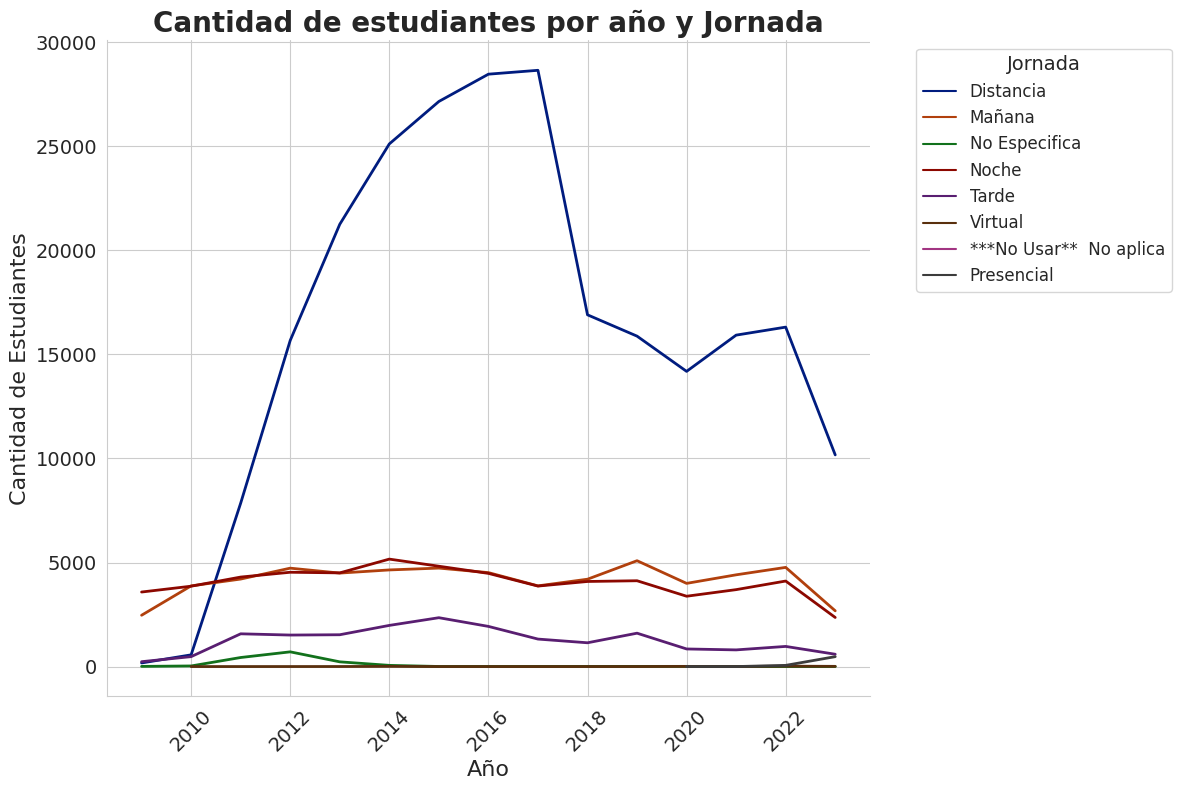

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Jornada', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Jornada'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Jornada', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Jornada', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Jornada', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

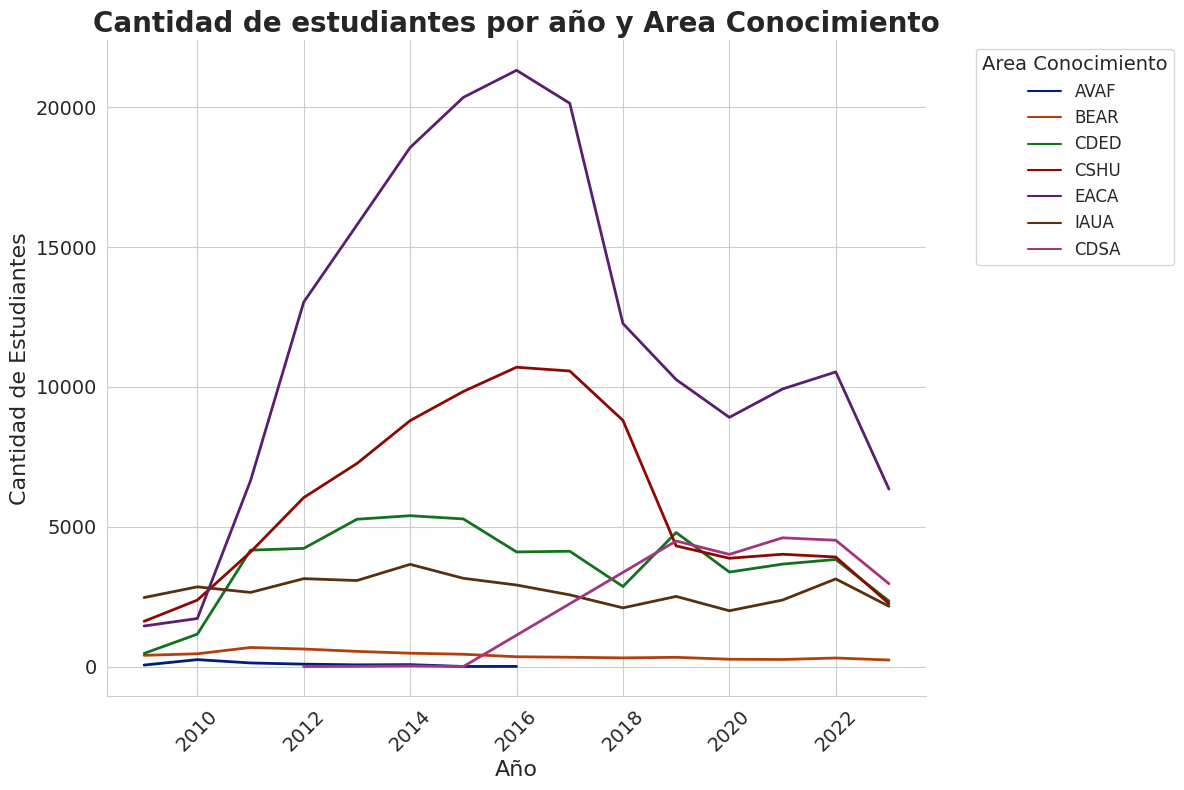

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Area Conocimiento', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Area Conocimiento'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Area Conocimiento', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Area Conocimiento', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Area Conocimiento', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

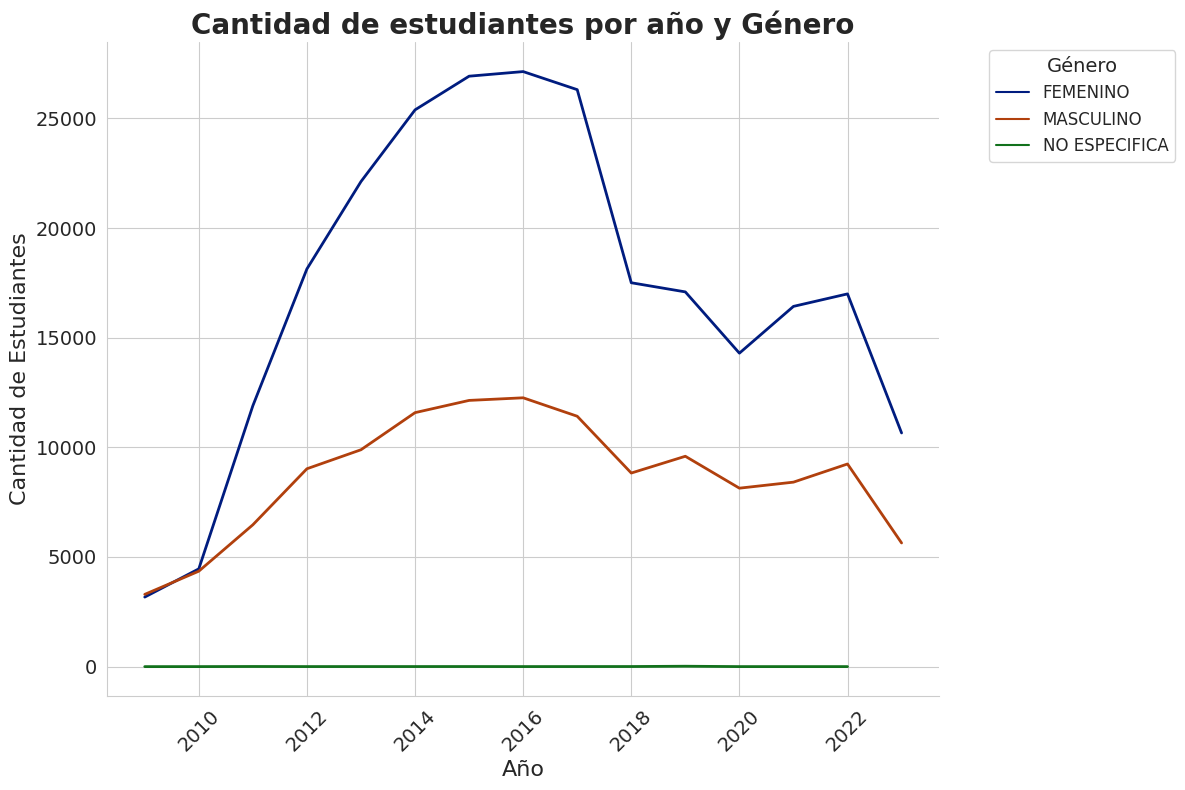

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Género', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Género'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Género', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Género', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Género', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

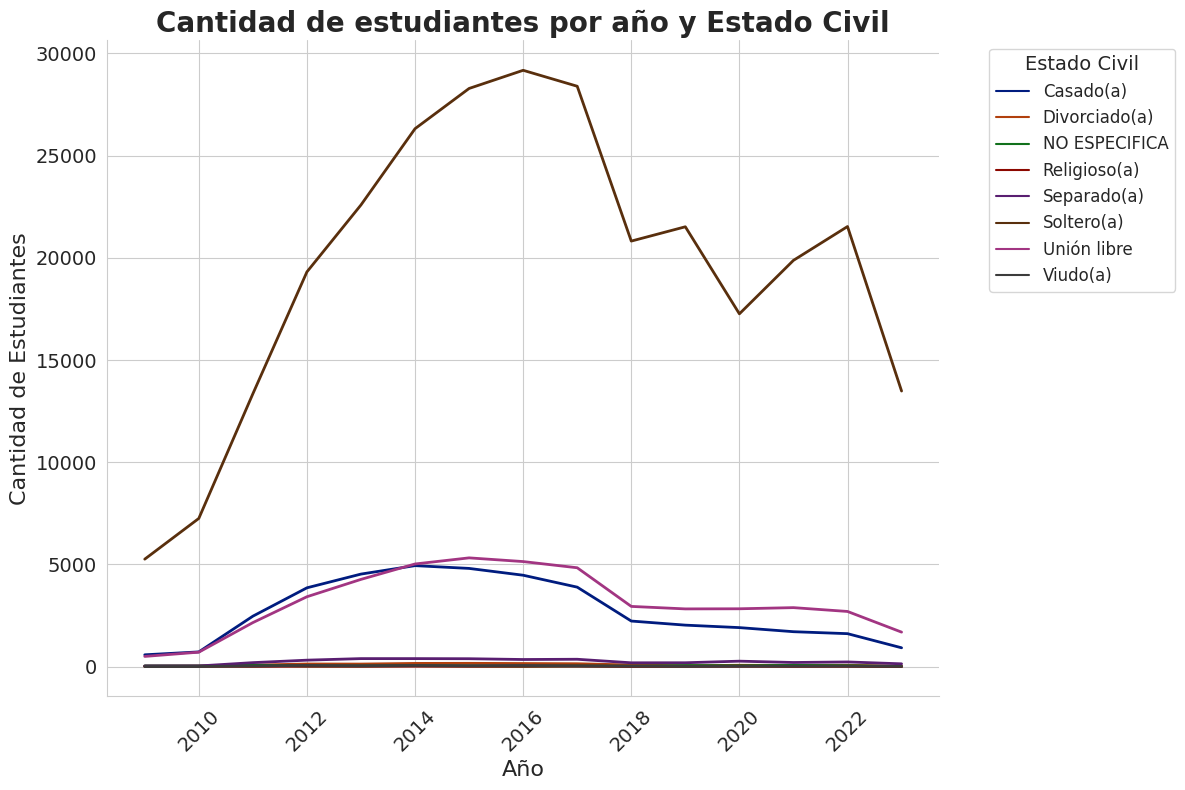

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estado Civil', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estado Civil'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estado Civil', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estado Civil', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estado Civil', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

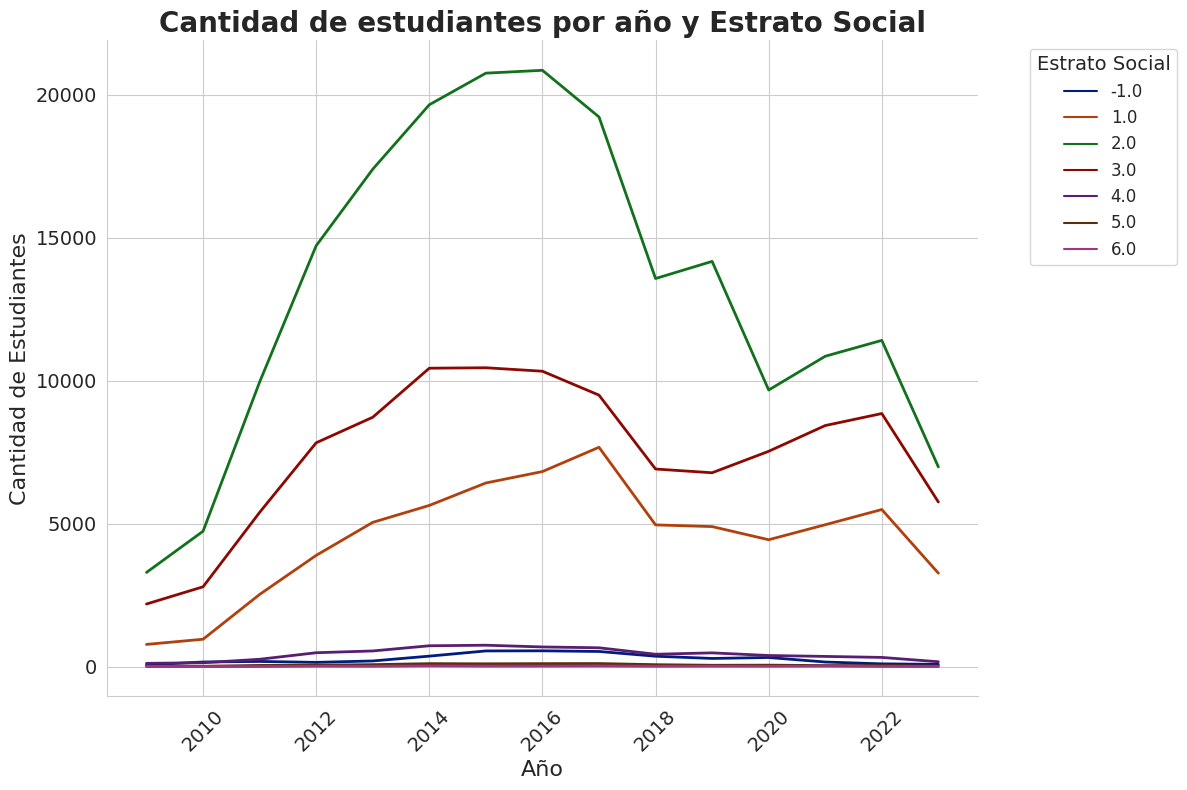

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estrato Social'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estrato Social', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estrato Social', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estrato Social', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

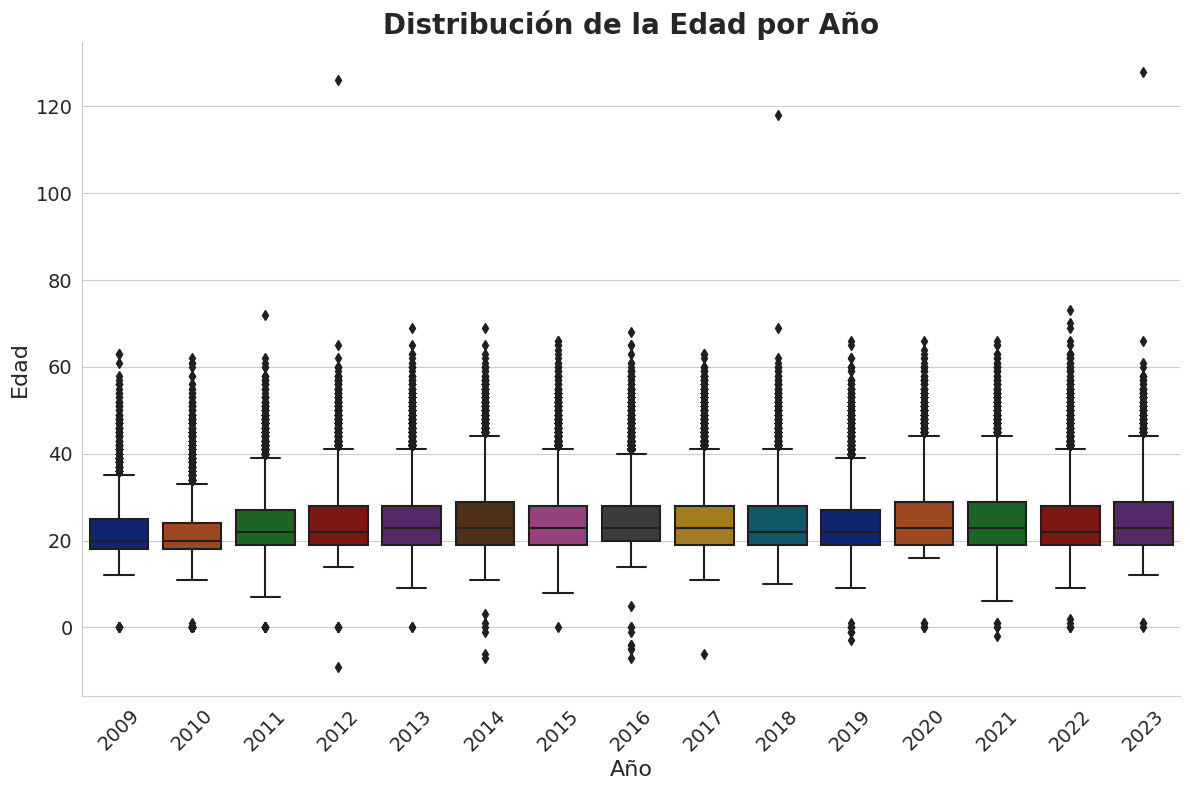

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' es una columna numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, x='ano', y='Edad', palette=colores_oscuros)
plt.title('Distribución de la Edad por Año', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Edad', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

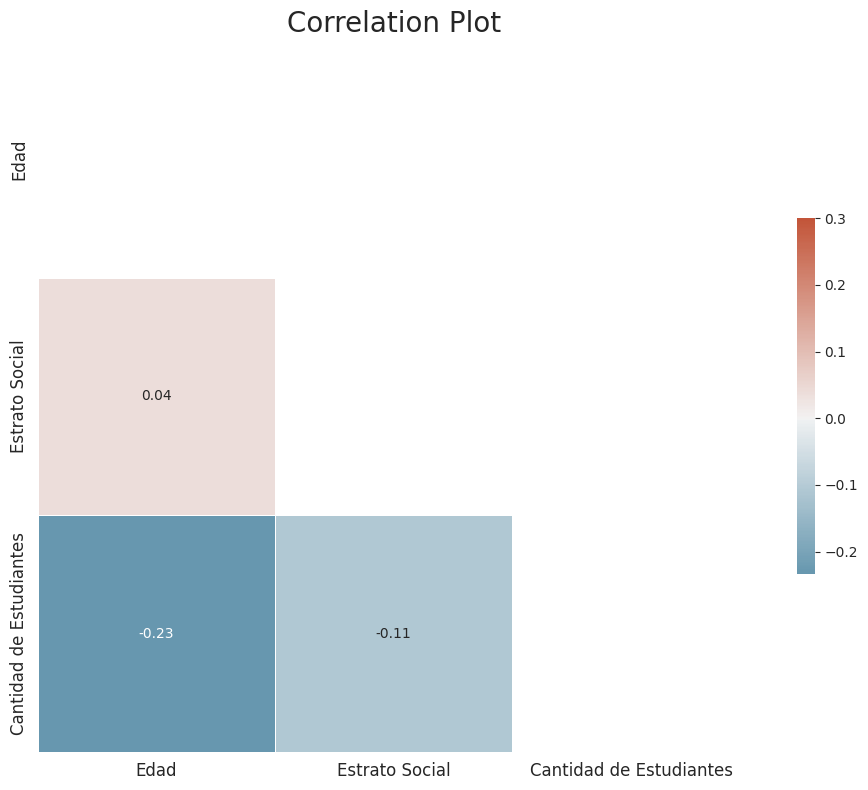

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' y 'Estrato Social' son columnas numéricas
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Estrato Social'] = pd.to_numeric(df['Estrato Social'], errors='coerce')

# Agrupa los datos por 'Edad' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['Edad', 'Estrato Social']).size().reset_index(name='Cantidad de Estudiantes')

# Calcula la matriz de correlación
corr = datos_agrupados.corr()

# Configura el tamaño y el estilo de la figura
plt.figure(figsize=(10, 8))
sns.set_style('white')

# Crea una máscara para la parte superior del triángulo (opcional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Configura el título y las etiquetas
plt.title('Correlation Plot', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
revisar = df[df.semestre=='01']
revisar['Cuatrimestre población'].value_counts(normalize=True)


Semestre 1        0.751490
cuatrimestre 1    0.133433
cuatrimestre 2    0.115051
Curso libre       0.000021
Semestre 2        0.000004
Name: Cuatrimestre población, dtype: float64

17 a 21 anos

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia', 'semestre',
       'ano'],
      dtype='object')

In [ ]:
df['Estrato Social'].value_counts(normalize=True)*100

 2.0    50.751186
 3.0    28.794246
 1.0    17.440054
 4.0     1.683931
-1.0     1.050271
 5.0     0.227336
 6.0     0.052976
Name: Estrato Social, dtype: float64

In [ ]:
df['Cuatrimestre población'].unique()

array(['cuatrimestre 1', 'Semestre 1', 'Cuatrimestre 3', 'Semestre 2',
       'cuatrimestre 2', 'Curso libre'], dtype=object)

# 3. Preparación de los datos

In [ ]:
df = df[df.Jornada!= '***No Usar**  No aplica']
df = df[df['Cuatrimestre población']!='Curso libre']
df_final = df[['ano', 'Cuatrimestre población', 'Sede', 'Rectoría/Vicerrectoría', 'Fecha Nacimiento', 'Descripción Metodología', 'Código Estudiante Banner']]
df_final

,ano,Cuatrimestre población,Sede,Rectoría/Vicerrectoría,Fecha Nacimiento,Descripción Metodología,Código Estudiante Banner
0,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,6/03/83,Distancia Tradicional,000109692
1,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,5/03/86,Distancia Tradicional,000111887
2,2009,Semestre 1,COA SOACHA,Rectoría Cundinamarca,18/02/86,Presencial,000004566
3,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,6/02/87,Presencial,000005091
4,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,25/08/92,Presencial,000006784
...,...,...,...,...,...,...,...
388848,2023,Semestre 1,COA CARTAGENA,Rectoría Caribe,23/05/91,Distancia Tradicional,909229
388849,2023,Semestre 1,COA IBAGUE,Rectoría Tolima y Magdalena Medio,19/08/01,Presencial,909230
388850,2023,Semestre 1,COA SOACHA,Rectoría Cundinamarca,7/08/02,Presencial,909233
388851,2023,Semestre 1,COA BARRANQUILLA,Rectoría Caribe,13/02/90,Distancia Tradicional,909238


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

df_final['semestre'] = np.where(
    df_final['Cuatrimestre población'].isin(['cuatrimestre 1', 'Semestre 1', 'cuatrimestre 2']),
    1,
    2
)
df_final = df_final.rename(columns={
    'Rectoría/Vicerrectoría': 'Rectoria',
    'Descripción Metodología': 'Modalidad'
})

# Asegúrate de que 'Fecha Nacimiento' esté en formato datetime
df_final['Fecha Nacimiento'] = pd.to_datetime(df_final['Fecha Nacimiento'])

# Paso 2: Calcular la edad
# Asumiendo que la columna 'ano' contiene el año actual o un año específico
df_final['edad'] = df_final['ano'] - df_final['Fecha Nacimiento'].dt.year


df_final['objetivo'] = df_final['edad'].apply(lambda x: 1 if 17 <= x <= 21 else 0)


# Paso 3: Eliminar la columna 'Fecha Nacimiento'
df_final = df_final.drop(columns=['Fecha Nacimiento', 'Cuatrimestre población', 'edad'])

# Mostrar el DataFrame actualizado
df_final

,ano,Sede,Rectoria,Modalidad,Código Estudiante Banner,semestre,objetivo
0,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,000109692,1,0
1,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,000111887,1,0
2,2009,COA SOACHA,Rectoría Cundinamarca,Presencial,000004566,1,0
3,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,000005091,1,0
4,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,000006784,1,1
...,...,...,...,...,...,...,...
388848,2023,COA CARTAGENA,Rectoría Caribe,Distancia Tradicional,909229,1,0
388849,2023,COA IBAGUE,Rectoría Tolima y Magdalena Medio,Presencial,909230,1,0
388850,2023,COA SOACHA,Rectoría Cundinamarca,Presencial,909233,1,1
388851,2023,COA BARRANQUILLA,Rectoría Caribe,Distancia Tradicional,909238,1,0


In [ ]:
def update_sede(row):
    if row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO BOSA":
        return "COA BOSA DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO BOSA":
        return "COA BOSA PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE PRES"
    elif row['Modalidad'] == "CO CANDELARIA":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "CO TUNAL":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "Ceres Valle de Aburrá":
        return "COA BELLO"
    elif row['Modalidad'] == "CERES PRADO CALI":
        return "COA CALI"
    else:
        return row['Modalidad']

df_final['Modalidad'] = df_final.apply(update_sede, axis=1)
df_final['Sede'] = df_final['Sede'].replace('^COA|^CO', 'CU', regex=True)


def update_rectoria(row):
    if row['Rectoria'] == "Vicerrectoría Regional Bogotá Sur":
        return "Rectoría UNIMINUTO Bogotá"
    else:
        return row['Rectoria']

df_final['Rectoria'] = df_final.apply(update_rectoria, axis=1)

In [ ]:
df_final.columns

Index(['ano', 'Sede', 'Rectoria', 'Modalidad', 'Código Estudiante Banner',
       'semestre', 'objetivo'],
      dtype='object')

In [ ]:
import pandas as pd

# Asumiendo que ya tienes df_final
#df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Sede', 'Modalidad', 'objetivo']).size().reset_index(name='y')
df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Modalidad', 'objetivo']).size().reset_index(name='y')


# Identificador unico por timeseries.
#df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Sede', 'Modalidad', 'objetivo']).ngroup() + 1
df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Modalidad', 'objetivo']).ngroup() + 1

def grouped_data(df):
    if df.empty:
        print("DataFrame is empty.")
        return df
    if "unique_id" not in df.columns:
        print("'unique_id' column does not exist in the DataFrame.")
        return df

    grouped = df.groupby(["unique_id"], as_index=False).agg(
        {"y": ["mean", "std"]}
    )
    grouped.columns = grouped.columns.map("_".join)
    grouped = grouped.reset_index(drop=True).rename(
        columns={"unique_id_": "unique_id"}
    )
    grouped["y_std"] = grouped["y_std"].fillna(0)
    grouped["upper_limit"] = grouped["y_mean"] + 3 * grouped["y_std"]
    grouped["lower_limit"] = grouped["y_mean"] - 3 * grouped["y_std"]

    df = df.merge(grouped, how="left", on="unique_id")
    df.loc[
        (df["y"] > df["upper_limit"])
        | (df["y"] < df["lower_limit"]),
        "y",
    ] = df["y_mean"]
    df = df[df.y > 0]

    return df

df_agrupado = grouped_data(df_agrupado)

# Asumiendo que df_transformed es tu DataFrame y que 'ano' y 'semestre' son las columnas de interés
df_agrupado['time_index'] = (df_agrupado['ano'] - df_agrupado['ano'].min()) * 2 + df_agrupado['semestre']

# Convertir 'time_index' a entero si es necesario (por si 'semestre' es una columna de tipo string)
df_agrupado['time_index'] = df_agrupado['time_index'].astype(int)


df_agrupado

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,lower_limit,time_index
0,2009,1,Rectoría Antioquia - Chocó,Presencial,0,201.0,3,306.793103,79.543510,545.423633,68.162574,1
1,2009,1,Rectoría Antioquia - Chocó,Presencial,1,177.0,4,360.068966,131.240491,753.790439,-33.652508,1
2,2009,1,Rectoría Cundinamarca,Distancia Tradicional,0,41.0,9,626.655172,352.904203,1685.367783,-432.057438,1
3,2009,1,Rectoría Cundinamarca,Distancia Tradicional,1,10.0,10,396.103448,256.523369,1165.673556,-373.466659,1
4,2009,1,Rectoría Cundinamarca,Presencial,0,281.0,11,362.241379,102.982889,671.190045,53.292713,1
...,...,...,...,...,...,...,...,...,...,...,...,...
960,2023,1,Rectoría Tolima y Magdalena Medio,Presencial,1,183.0,36,47.000000,60.008888,227.026665,-133.026665,29
961,2023,1,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,0,2487.0,37,1886.206897,1245.724499,5623.380393,-1850.966600,29
962,2023,1,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,1,626.0,38,402.413793,249.686020,1151.471852,-346.644266,29
963,2023,1,Rectoría UNIMINUTO Bogotá,Presencial,0,897.0,39,900.000000,214.663358,1543.990073,256.009927,29


In [ ]:
a = df_agrupado[['ano', 'semestre', 'time_index', 'Rectoria']]
unique_rows = a.drop_duplicates()
unique_rows

,ano,semestre,time_index,Rectoria
0,2009,1,1,Rectoría Antioquia - Chocó
2,2009,1,1,Rectoría Cundinamarca
6,2009,1,1,Rectoría Orinoquía
10,2009,1,1,Rectoría Santanderes
13,2009,1,1,Rectoría Sur Occidente
...,...,...,...,...
945,2023,1,29,Rectoría Santanderes
949,2023,1,29,Rectoría Sur
953,2023,1,29,Rectoría Sur Occidente
957,2023,1,29,Rectoría Tolima y Magdalena Medio


In [ ]:
# Combine 'ano' and 'semestre' into a single period column
unique_rows['period'] = unique_rows['ano'].astype(str) + '-' + unique_rows['semestre'].astype(str)

# Grouping by 'Rectoria' and performing the aggregation
grouped = unique_rows.groupby('Rectoria').agg({
    'period': ['min', 'max'],
    'time_index': 'count'
}).reset_index()

# Flattening the column names and renaming for clarity
grouped.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped.columns.values]
grouped.rename(columns={
    'period_min': 'Start_Period',
    'period_max': 'End_Period',
    'time_index_count': 'Num_Semesters'
}, inplace=True)

grouped[['Rectoria', 'Num_Semesters', 'Start_Period', 'End_Period']]


,Rectoria,Num_Semesters,Start_Period,End_Period
0,Rectoría Antioquia - Chocó,29,2009-1,2023-1
1,Rectoría Caribe,25,2011-1,2023-1
2,Rectoría Cundinamarca,29,2009-1,2023-1
3,Rectoría Eje Cafetero,25,2010-1,2023-1
4,Rectoría Orinoquía,29,2009-1,2023-1
5,Rectoría Santanderes,29,2009-1,2023-1
6,Rectoría Sur,26,2010-2,2023-1
7,Rectoría Sur Occidente,29,2009-1,2023-1
8,Rectoría Tolima y Magdalena Medio,29,2009-1,2023-1
9,Rectoría UNIMINUTO Bogotá,29,2009-1,2023-1


In [ ]:
df_agrupado.unique_id.nunique()

40

In [ ]:
df_agrupado.to_excel('por_rectoria.xlsx')

In [ ]:
df_agrupado['ds'] = pd.to_datetime(df_agrupado['ano'].astype(str) + '-' + (df_agrupado['semestre'] * 6).astype(str) + '-01')


# 4. Modelado

Se realizaran una validación de diferentes metodos y X, para validar la mejor estrategia.

In [ ]:
!git clone https://github.com/jsebastianquiroga/analitica_ia_puj.git

Cloning into 'analitica_ia_puj'...
remote: Enumerating objects: 825, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 825 (delta 274), reused 162 (delta 121), pack-reused 475
Receiving objects: 100% (825/825), 18.33 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (614/614), done.


In [ ]:
pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 17.5 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.8-py3-none-any.whl size=158200 sha256=e4fea0439a29bcc5c11fb7c8a04089ac5124ee532e18cfe38ca595920caabcd8
  Stored in directory: /root/.cache/pip/wheels/a4/2b/3e/8ac985ad100a8f27de940864344fe14f47bc3d2fed7f29bf70
Successfully built fugue-sql-antlr


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
pip install lightgbm==3.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
pip install dtw

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.2 MB/s eta 0:00:00


#4.1. Matriz original division en train y test.

In [ ]:
import pandas as pd

semestres_validar = 10

# Creando el dataset de entrenamiento
train = df_agrupado.loc[df_agrupado['time_index'] < (df_agrupado['time_index'].max() - semestres_validar)]

# Creando el dataset de validación
validation = df_agrupado.loc[(df_agrupado['time_index'] >= (df_agrupado['time_index'].max() - semestres_validar))]

df = train.append(validation)


from analitica_ia_puj.Tesis.data_processor import ClasePrediccion

mi_clase = ClasePrediccion(df, 14)  # Aquí 2 es un ejemplo para 'meses_a_predecir'
train_f, test_f, df_f = mi_clase.procesar()

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels

# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting = Autoregresive(train, validation, df, season_length=2, semestres_predecir=5)
validacion = forecasting.run_workflow()

train_f = train.append(validation)
test_f = test.copy()
df_f = train_f.append(test_f)

forecasting_2 = Autoregresive(
    train_f, test_f, df_f, season_length=2, semestres_predecir=5)


teste = forecasting_2.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

fore = GradientBoostingModels(train, validation, test_f, validacion, teste)
validacion, teste = fore.pipeline()
#fore.save_models()   # Guardar los modelos

X_train = fore.train.drop('y', axis=1)

# Llama al método para calcular y graficar los SHAP values.
shap_values = fore.calculate_and_plot_shap_values(X_train)

validacion


In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator = ModelEvaluator(validacion = validacion, test =teste)
evaluacion, validacion_final, prediccion_final = evaluator.pipeline()

evaluacion

In [ ]:
prediccion_final

In [ ]:
prediccion_final.to_csv('predicciones_2030.csv')

In [ ]:
train_f.to_csv('historicos.csv')